# Linear Regresyon Modeli (Deprem Büyüklüğü Tahmin)

## Veri Setinin CSV formatına dönüştürülmesi

In [53]:
import pandas as pd

df_excel = pd.read_excel("Earthquake_4.xlsx")

csv_file_path = "Earthquake_4.csv"

df_excel.to_csv(csv_file_path, index=False)

print(f"CSV dosyası başarıyla kaydedildi: {csv_file_path}")


CSV dosyası başarıyla kaydedildi: Earthquake_4.csv


In [21]:
df = pd.read_csv("Earthquake_4.csv")
df.head()

,Date,Longitude,Latitude,Depth,Type,Magnitude,Location,EventID,TimeName,TypeName,MagnitudeName
0,01/04/2025 13:52:35,30.4314,35.9406,24.21,MW,4.1,Akdeniz - [41.71 km] Kumluca (Antalya),656426,AFAD,AFAD,AFAD
1,27/03/2025 17:51:52,25.7344,36.6817,7.00,MW,4.5,Ege Denizi,656087,AFAD,AFAD,AFAD
2,21/03/2025 03:47:26,25.4622,36.6025,7.00,MW,4.2,Ege Denizi,655633,AFAD,AFAD,AFAD
3,20/03/2025 18:33:47,40.6242,39.6608,6.98,MW,4.2,Tercan (Erzincan),655603,AFAD,AFAD,AFAD
4,16/03/2025 15:07:19,24.8008,36.4333,7.00,MW,4.1,Ege Denizi,655339,AFAD,AFAD,AFAD


## Veri Setinin Temizlenmesi => Eksik veri olmadığı için herhangi bir işlem yapılmadı ancak gereksiz features silindi

In [22]:
df.isnull().sum()

Date             0
Longitude        0
Latitude         0
Depth            0
Type             0
Magnitude        0
Location         0
EventID          0
TimeName         0
TypeName         0
MagnitudeName    0
dtype: int64

In [23]:
df.dtypes

Date              object
Longitude        float64
Latitude         float64
Depth            float64
Type              object
Magnitude        float64
Location          object
EventID            int64
TimeName          object
TypeName          object
MagnitudeName     object
dtype: object

In [24]:
df.info

<bound method DataFrame.info of                       Date  Longitude  Latitude  Depth Type  Magnitude  \
0      01/04/2025 13:52:35    30.4314   35.9406  24.21   MW        4.1   
1      27/03/2025 17:51:52    25.7344   36.6817   7.00   MW        4.5   
2      21/03/2025 03:47:26    25.4622   36.6025   7.00   MW        4.2   
3      20/03/2025 18:33:47    40.6242   39.6608   6.98   MW        4.2   
4      16/03/2025 15:07:19    24.8008   36.4333   7.00   MW        4.1   
...                    ...        ...       ...    ...  ...        ...   
16144  30/01/1900 01:00:00    27.7100   37.8300  10.00   MS        4.4   
16145  27/01/1900 02:30:00    37.3700   37.6300  10.00   MS        4.8   
16146  24/01/1900 03:00:00    26.1400   39.5400  10.00   MS        5.2   
16147  18/01/1900 15:30:00    28.2100   37.7900  10.00   MS        4.4   
16148  05/01/1900 00:55:00    34.0000   34.0000  10.00   MS        5.9   

                                     Location  EventID               TimeName  

In [25]:
df.columns

Index(['Date', 'Longitude', 'Latitude', 'Depth', 'Type', 'Magnitude',
       'Location', 'EventID', 'TimeName', 'TypeName', 'MagnitudeName'],
      dtype='object')

In [26]:
df = df.drop( columns=["Type","EventID","TimeName","TypeName","MagnitudeName"] )
df.head()

,Date,Longitude,Latitude,Depth,Magnitude,Location
0,01/04/2025 13:52:35,30.4314,35.9406,24.21,4.1,Akdeniz - [41.71 km] Kumluca (Antalya)
1,27/03/2025 17:51:52,25.7344,36.6817,7.00,4.5,Ege Denizi
2,21/03/2025 03:47:26,25.4622,36.6025,7.00,4.2,Ege Denizi
3,20/03/2025 18:33:47,40.6242,39.6608,6.98,4.2,Tercan (Erzincan)
4,16/03/2025 15:07:19,24.8008,36.4333,7.00,4.1,Ege Denizi


## Features (X) ve Target (y) sütunları ayrıldı.

In [27]:
X = df.drop( columns=["Date","Location","Magnitude"] )
y = df["Magnitude"]
X.shape,y.shape

((16149, 3), (16149,))

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=42 )
X_train.shape, X_test.shape

((12919, 3), (3230, 3))

## Modelin Eğitilmesi

In [42]:
model = LinearRegression()
model.fit( X_train, y_train )

LinearRegression()

## Modelin Test Verisi Üzerinde Yaptığı Tahminler

In [43]:
y_pred = model.predict( X_test  ) 

In [49]:
mae = mean_absolute_error( y_test, y_pred )

In [50]:
mse = mean_squared_error( y_test , y_pred )

In [51]:
r2 = r2_score( y_test, y_pred)

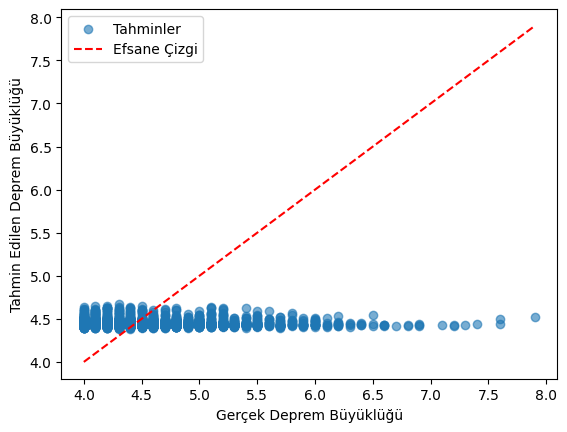

In [38]:
plt.scatter( y_test , y_pred , label="Tahminler" , alpha=0.6)
plt.xlabel( "Gerçek Deprem Büyüklüğü" )
plt.ylabel( "Tahmin Edilen Deprem Büyüklüğü" )

min_val = min( y_test.min() , y_pred.min() )
max_val = max( y_test.max() , y_pred.max() )

plt.plot( [min_val,max_val] , [min_val,max_val] , color="red" , linestyle="--" , label="Efsane Çizgi")
plt.legend()
plt.show()

In [52]:
print("Ortalama Mutlak Hata (Mean Absolute Error): ",mae)
print("Ortalama Karesel Hata (Mean Squared Error): ",mse)
print("R2 Skoru (R2 Score): ",r2)

Ortalama Mutlak Hata (Mean Absolute Error):  0.3419331616741432
Ortalama Karesel Hata (Mean Squared Error):  0.2109336833922216
R2 Skoru (R2 Score):  0.005537063523308849


# Decision Tree (Karar Ağaçları)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import seaborn as sb
import pandas as pd
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score

In [5]:
df2 = pd.read_csv("Earthquake_4.csv")
df2.head()

,Date,Longitude,Latitude,Depth,Type,Magnitude,Location,EventID,TimeName,TypeName,MagnitudeName
0,01/04/2025 13:52:35,30.4314,35.9406,24.21,MW,4.1,Akdeniz - [41.71 km] Kumluca (Antalya),656426,AFAD,AFAD,AFAD
1,27/03/2025 17:51:52,25.7344,36.6817,7.00,MW,4.5,Ege Denizi,656087,AFAD,AFAD,AFAD
2,21/03/2025 03:47:26,25.4622,36.6025,7.00,MW,4.2,Ege Denizi,655633,AFAD,AFAD,AFAD
3,20/03/2025 18:33:47,40.6242,39.6608,6.98,MW,4.2,Tercan (Erzincan),655603,AFAD,AFAD,AFAD
4,16/03/2025 15:07:19,24.8008,36.4333,7.00,MW,4.1,Ege Denizi,655339,AFAD,AFAD,AFAD


In [6]:
X2 = df2.drop( columns=["Date","Type","Location","EventID","TimeName","TypeName","MagnitudeName","Magnitude"] )
y2 = df2["Magnitude"]

In [7]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X2,y2, test_size=0.3,random_state=42 )

In [8]:
model2 = DecisionTreeRegressor( max_depth=5,random_state=42 )
model2.fit( X2_train,y2_train )

DecisionTreeRegressor(max_depth=5, random_state=42)

In [10]:
y_pred2 = model2.predict( X2_test )

In [13]:
mae2 = mean_absolute_error( y_pred2, y2_test )
mse2 = mean_squared_error( y_pred2, y2_test )
r2_2  = r2_score( y_pred2, y2_test )

In [14]:
print("Ortalama Mutlak Hata (Mean Absolute Error): ",mae2)
print("Ortalama Karesel Hata (Mean Squared Error): ",mse2)
print("R2 Skoru (R2 Score): ",r2_2)

Ortalama Mutlak Hata (Mean Absolute Error):  0.3324560107009577
Ortalama Karesel Hata (Mean Squared Error):  0.2052955637846654
R2 Skoru (R2 Score):  -10.521363595316174


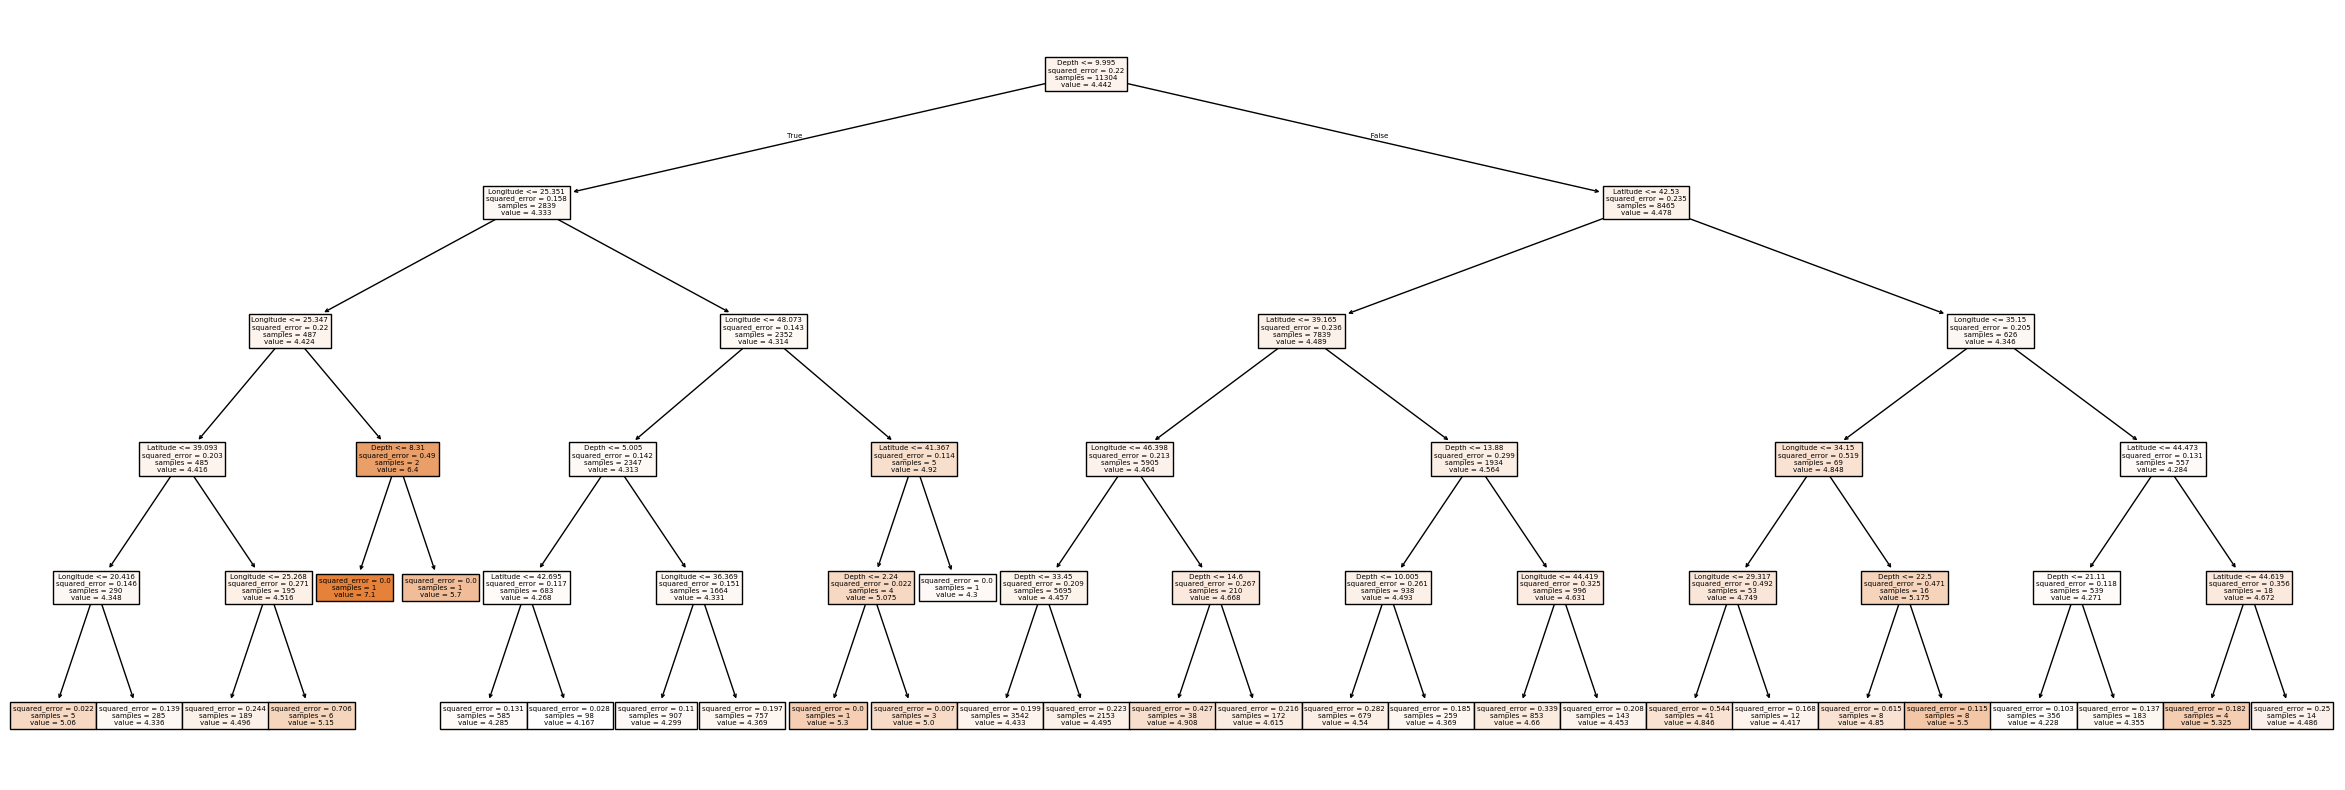

In [15]:
plt.figure( figsize=(30,10) )
plot_tree( model2, feature_names=X2.columns, filled=True )
plt.show()  

# RANDOM FOREST

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
model3 = RandomForestRegressor( max_depth=4, random_state=42, n_estimators=10 )
model3.fit( X2_train, y2_train )

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

In [20]:
y_pred3 = model3.predict(X2_test)

In [21]:
mae3 = mean_absolute_error( y_pred3, y2_test )
mse3 = mean_squared_error( y_pred3, y2_test )
r2_3 = r2_score( y_pred3, y2_test )

In [23]:
( "Random Forest:", mae3, mse3, r2_3 )

('Random Forest:', 0.3292707284841413, 0.1987203048816271, -21.916526099624193)

In [24]:
( "Decision Tree:", mae2, mse2, r2_2 )

('Decision Tree:', 0.3324560107009577, 0.2052955637846654, -10.521363595316174)